<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/128080_impose_business_minimum_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
X = np.random.rand(100, 1)

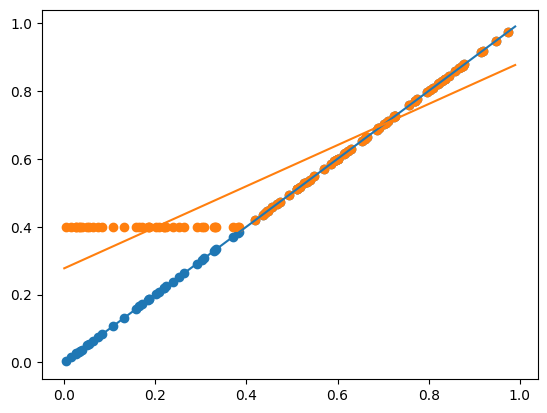

In [10]:
# past the business threshold, the truth continues the same pattern:
y_raw = X
y_clip = np.clip(y_raw, a_min=0.4, a_max=np.inf)
lr_raw = LinearRegression()
lr_raw.fit(X, y_raw)
lr_clip = LinearRegression()
lr_clip.fit(X, y_clip)

plt.scatter(X, y_raw)
plt.scatter(X, y_clip)
x_mesh = np.arange(0, 1, 0.01)
plt.plot(x_mesh, lr_raw.predict(x_mesh[:, np.newaxis]))
plt.plot(x_mesh, lr_clip.predict(x_mesh[:, np.newaxis]))
plt.show();

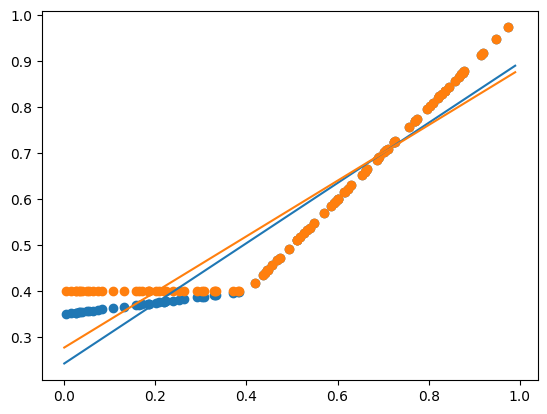

In [12]:
# past the business threshold, the truth diverges from the rest of the pattern;
# at the most extreme, the business threshold is the reality, but
# maybe here it's just a soft-min?
y_raw = np.where(X > 0.4, X, 0.35 + X / 8)
y_clip = np.clip(y_raw, a_min=0.4, a_max=np.inf)
lr_raw = LinearRegression()
lr_raw.fit(X, y_raw)
lr_clip = LinearRegression()
lr_clip.fit(X, y_clip)

plt.scatter(X, y_raw)
plt.scatter(X, y_clip)
x_mesh = np.arange(0, 1, 0.01)
plt.plot(x_mesh, lr_raw.predict(x_mesh[:, np.newaxis]))
plt.plot(x_mesh, lr_clip.predict(x_mesh[:, np.newaxis]))
plt.show();

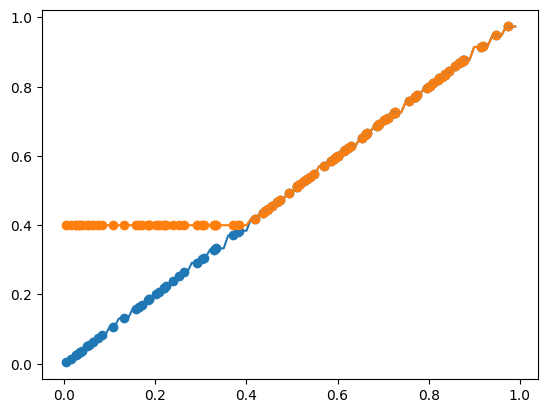

In [16]:
# Tree models don't have to grow as many branches
y_raw = X
y_clip = np.clip(y_raw, a_min=0.4, a_max=np.inf)
dt_raw = DecisionTreeRegressor(max_depth=10)
dt_raw.fit(X, y_raw)
dt_clip = DecisionTreeRegressor(max_depth=10)
dt_clip.fit(X, y_clip)

plt.scatter(X, y_raw)
plt.scatter(X, y_clip)
x_mesh = np.arange(0, 1, 0.01)
plt.plot(x_mesh, dt_raw.predict(x_mesh[:, np.newaxis]))
plt.plot(x_mesh, dt_clip.predict(x_mesh[:, np.newaxis]))
plt.show();

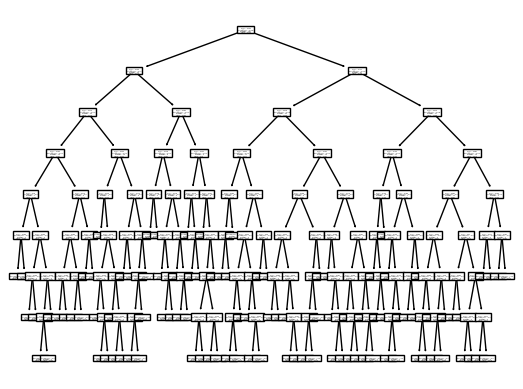

In [17]:
plot_tree(dt_raw);

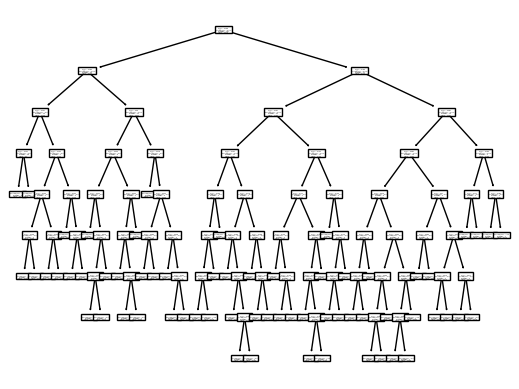

In [18]:
plot_tree(dt_clip);

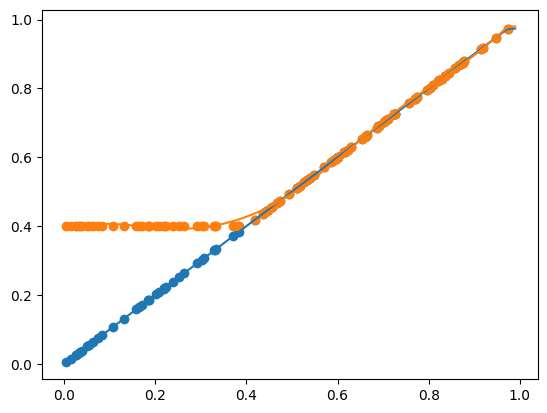

In [20]:
# splines!
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

y_raw = X
y_clip = np.clip(y_raw, a_min=0.4, a_max=np.inf)
lr_raw = make_pipeline(SplineTransformer(), LinearRegression())
lr_raw.fit(X, y_raw)
lr_clip = make_pipeline(SplineTransformer(), LinearRegression())
lr_clip.fit(X, y_clip)

plt.scatter(X, y_raw)
plt.scatter(X, y_clip)
x_mesh = np.arange(0, 1, 0.01)
plt.plot(x_mesh, lr_raw.predict(x_mesh[:, np.newaxis]))
plt.plot(x_mesh, lr_clip.predict(x_mesh[:, np.newaxis]))
plt.show();